# Imported needed packages

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

# read in the covid data and remove the following columns

>All-cause death count, 2018

>All-cause death count, 2017

>Log of average distance to SARS countries

# round all floats to three decimal places

In [2]:
#my_path = os.chdir('/Users/colinobrien/Desktop/Repo/DS_5100/ds5100_prog_for_ds_jv')
COVID_data = pd.read_excel('MortalityDataWHR2021C2.xlsx')
#print(COVID_data.columns)

cols_to_remove = ['Island','All-cause death count, 2018','All-cause death count, 2017','Log of average distance to SARS countries']
removed_cols = COVID_data[cols_to_remove]

COVID_data_cleaned = COVID_data.drop(cols_to_remove, axis=1)
pd.options.display.float_format = '{:.3f}'.format 
#COVID_data_cleaned 

# read in the 2020 and 2021 happiness data.
## rename the columns to include a '20_' or '21_' 
## rename country name and regional indicators (and drop regional indicators from one of them) to make merging easier later

In [3]:
happy20 = pd.read_csv('WHR2020.csv')

old_header = list(happy20.columns.values)
new_header = ['20_' + i for i in old_header]


happy20_cleaned1 = pd.read_csv('WHR2020.csv', names = new_header, header = None, skiprows=1)
happy20_cleaned1 = happy20_cleaned1.rename(columns = {'20_Country name':'Country name'})
happy20_cleaned = happy20_cleaned1.drop('20_Regional indicator', axis=1)

In [4]:
happy21 = pd.read_csv('world-happiness-report-2021.csv')

old_header2 = list(happy21.columns.values)
new_header2 = ['21_' + i for i in old_header2]


happy21_cleaned = pd.read_csv('world-happiness-report-2021.csv', names = new_header2, header = None,  skiprows=1)
happy21_cleaned = happy21_cleaned.rename(columns = {'21_Country name':'Country name', '21_Regional indicator':'Regional indicator'})

# merge happiness data on country name

## I merged with how='left' so that it dropped countries that were only taken for one of the two years

In [5]:
happy_21_and_20 = pd.merge(happy21_cleaned, happy20_cleaned , on="Country name", how='left')

# I created columns that take the difference between the numeric columns of 2020 and 2021

In [6]:
happy_covid_column_list = list(happy_21_and_20.columns)
cols_for_21 = [i for i in happy_covid_column_list if i.startswith('21_')]
cols_for_20 = [i for i in happy_covid_column_list if i.startswith('20_')]

for new_col in range(len(cols_for_21)):
    happy_21_and_20[cols_for_21[new_col][3:] + '_diff'] = happy_21_and_20[cols_for_21[new_col]] - happy_21_and_20[cols_for_20[new_col]]

#happy_21_and_20.columns

# merge all happiness (with the added difference columns) with the cleaned covid data

In [7]:
happy_and_COVID = pd.merge(happy_21_and_20, COVID_data_cleaned , on="Country name", how='left')
#happy_and_COVID.columns

# save the merged data into a csv

In [8]:
happy_and_COVID.to_csv("happy_and_COVID.csv", sep=",")

# Data exploration starts here

In [9]:
#list out all of the columns
list(happy_and_COVID.columns)

['Country name',
 'Regional indicator',
 '21_Ladder score',
 '21_Standard error of ladder score',
 '21_upperwhisker',
 '21_lowerwhisker',
 '21_Logged GDP per capita',
 '21_Social support',
 '21_Healthy life expectancy',
 '21_Freedom to make life choices',
 '21_Generosity',
 '21_Perceptions of corruption',
 '21_Ladder score in Dystopia',
 '21_Explained by: Log GDP per capita',
 '21_Explained by: Social support',
 '21_Explained by: Healthy life expectancy',
 '21_Explained by: Freedom to make life choices',
 '21_Explained by: Generosity',
 '21_Explained by: Perceptions of corruption',
 '21_Dystopia + residual',
 '20_Ladder score',
 '20_Standard error of ladder score',
 '20_upperwhisker',
 '20_lowerwhisker',
 '20_Logged GDP per capita',
 '20_Social support',
 '20_Healthy life expectancy',
 '20_Freedom to make life choices',
 '20_Generosity',
 '20_Perceptions of corruption',
 '20_Ladder score in Dystopia',
 '20_Explained by: Log GDP per capita',
 '20_Explained by: Social support',
 '20_Expl

In [10]:
#I list some columns that I think are interesting. 
#Then I create a correlation table with these varibales to get a feel on what I am looking at
rp_interesting_columns = [
    'Ladder score_diff',
    'Logged GDP per capita_diff',
    'Social support_diff',
    'Healthy life expectancy_diff',
    'Freedom to make life choices_diff',
    'Generosity_diff',
    'Perceptions of corruption_diff',
    'COVID-19 deaths per 100,000 population in 2020',
    'Index of exposure to COVID-19  infections in other countries as of March 31',
    'Index of institutional trust',
    'Gini coefficient of income',
    'All-cause death count, 2019',
    'All-cause death count, 2020',
    'Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average'
]

happy_and_COVID[rp_interesting_columns].corr()

,Ladder score_diff,Logged GDP per capita_diff,Social support_diff,Healthy life expectancy_diff,Freedom to make life choices_diff,Generosity_diff,Perceptions of corruption_diff,"COVID-19 deaths per 100,000 population in 2020",Index of exposure to COVID-19 infections in other countries as of March 31,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
Ladder score_diff,1.000,0.112,0.415,0.174,0.336,0.038,-0.173,0.066,0.093,-0.033,-0.044,-0.107,-0.116,0.153
Logged GDP per capita_diff,0.112,1.000,0.107,-0.011,0.259,-0.285,-0.123,0.181,0.116,-0.168,-0.172,-0.131,-0.141,0.040
Social support_diff,0.415,0.107,1.000,0.064,0.205,-0.019,-0.151,0.193,0.218,0.030,-0.282,-0.125,-0.126,0.162
Healthy life expectancy_diff,0.174,-0.011,0.064,1.000,0.106,0.158,0.100,-0.073,-0.041,0.007,0.141,-0.081,-0.068,0.374
Freedom to make life choices_diff,0.336,0.259,0.205,0.106,1.000,0.018,-0.361,0.250,0.248,-0.196,-0.322,-0.146,-0.150,0.243
Generosity_diff,0.038,-0.285,-0.019,0.158,0.018,1.000,0.188,-0.118,-0.299,-0.165,0.227,0.062,0.077,0.291
Perceptions of corruption_diff,-0.173,-0.123,-0.151,0.100,-0.361,0.188,1.000,0.008,0.003,0.028,0.109,0.033,0.040,-0.089
"COVID-19 deaths per 100,000 population in 2020",0.066,0.181,0.193,-0.073,0.250,-0.118,0.008,1.000,0.643,-0.377,-0.213,0.144,0.171,0.681
Index of exposure to COVID-19 infections in other countries as of March 31,0.093,0.116,0.218,-0.041,0.248,-0.299,0.003,0.643,1.000,-0.045,-0.577,-0.068,-0.079,0.157
Index of institutional trust,-0.033,-0.168,0.030,0.007,-0.196,-0.165,0.028,-0.377,-0.045,1.000,-0.001,-0.144,-0.159,-0.391


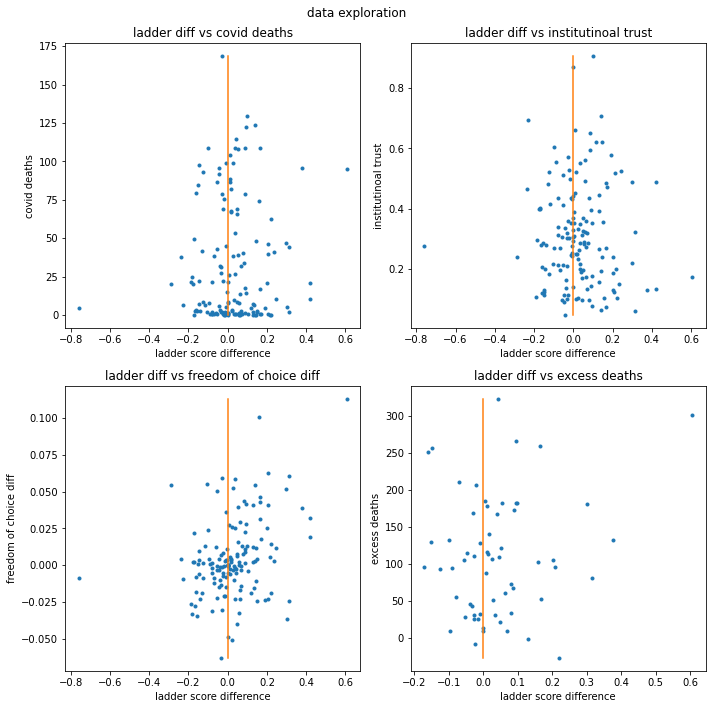

In [11]:
#Here I plot four graphs. I compare the difference in ladder score from 2021 to 2020 to the four listed variables below

ladder_21 = happy_and_COVID['21_Ladder score']
ladder_20 = happy_and_COVID['20_Ladder score']
ladder_diff = happy_and_COVID['Ladder score_diff']
x = happy_and_COVID['Index of institutional trust']
y = happy_and_COVID['COVID-19 deaths per 100,000 population in 2020']
z = happy_and_COVID['Freedom to make life choices_diff']
a = happy_and_COVID['Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average'] 


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
#plt.figsize(30)
fig.suptitle('data exploration')


ax1.plot(ladder_diff, y, '.')
ax1.plot((0,0), (min(y),max(y)))
ax1.set_title('ladder diff vs covid deaths')
ax1.set_xlabel('ladder score difference')
ax1.set_ylabel('covid deaths')


ax2.plot(ladder_diff, x, '.')
ax2.plot((0,0), (min(x),max(x)))
ax2.set_title('ladder diff vs institutinoal trust')
ax2.set_xlabel('ladder score difference')
ax2.set_ylabel('institutinoal trust')


ax3.plot(ladder_diff, z, '.')
ax3.plot((0,0), (min(z),max(z)))
ax3.set_title('ladder diff vs freedom of choice diff')
ax3.set_xlabel('ladder score difference')
ax3.set_ylabel('freedom of choice diff')


ax4.plot(ladder_diff, a, '.')
ax4.plot((0,0), (min(a),max(a)))
ax4.set_title('ladder diff vs excess deaths')
ax4.set_xlabel('ladder score difference')
ax4.set_ylabel('excess deaths')


fig.tight_layout()


In [12]:
#I compare averages for countries with increased/decreased ladder scores
ladder_increase = (happy_and_COVID['Ladder score_diff'] > 0)
ladder_decrease = (happy_and_COVID['Ladder score_diff'] <= 0)


print('\naverage covid deaths/100,000 for countries with an increased ladder score: ', y[ladder_increase].mean())
print('average covid deaths/100,000 for countries with a decreased ladder score: ', y[ladder_decrease].mean())

print('\naverage institutinoal trust score for countries with an increased ladder score: ', x[ladder_increase].mean())
print('average institutinoal trust score for countries with a decreased ladder score: ', x[ladder_decrease].mean())

print('\naverage freedom of choice score for countries with an increased ladder score: ', z[ladder_increase].mean())
print('average freedom of choice score for countries with a decreased ladder score: ', z[ladder_decrease].mean())


print('\naverage excess deaths/100,000 for countries with an increased ladder score: ', a[ladder_increase].mean())
print('average excess deaths/100,000 for countries with a decreased ladder score: ', a[ladder_decrease].mean())



average covid deaths/100,000 for countries with an increased ladder score:  34.96806459460498
average covid deaths/100,000 for countries with a decreased ladder score:  29.034301929855868

average institutinoal trust score for countries with an increased ladder score:  0.31067750387522114
average institutinoal trust score for countries with a decreased ladder score:  0.3116729771136306

average freedom of choice score for countries with an increased ladder score:  0.01033337090361446
average freedom of choice score for countries with a decreased ladder score:  -0.0019236901538461522

average excess deaths/100,000 for countries with an increased ladder score:  122.3077990089144
average excess deaths/100,000 for countries with a decreased ladder score:  93.21913451414842


# Ryan's Regression Attempt - Using statsmodels

## 1. Using 2020 and 2021 data, try to approximate model used to compute happiness ladder scores

## 2. Using the 2020 and 2021 data and the covid data, run a regression to see if covid daata is usefult in predicting change in happiness systematically across the 2 years



In [33]:
import statsmodels.api as sm

In [63]:
set1_cols = [
 '20_Logged GDP per capita',
 '20_Social support',
 '20_Healthy life expectancy',
 '20_Freedom to make life choices',
 '20_Generosity',
 '20_Perceptions of corruption',
 '20_Ladder score in Dystopia']


reg1_y_data = happy_and_COVID[['20_Ladder score']].dropna()
reg1_x_data = happy_and_COVID[set1_cols].dropna()
reg1_modl = sm.OLS(reg1_y_data, reg1_x_data).fit()


print(reg1_modl.summary())

                            OLS Regression Results                            
Dep. Variable:        20_Ladder score   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     66.16
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           1.44e-38
Time:                        22:04:04   Log-Likelihood:                -123.25
No. Observations:                 148   AIC:                             260.5
Df Residuals:                     141   BIC:                             281.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
20_Logged 

In [65]:
set2_cols = [
 '21_Logged GDP per capita',
 '21_Social support',
 '21_Healthy life expectancy',
 '21_Freedom to make life choices',
 '21_Generosity',
 '21_Perceptions of corruption',
 '21_Ladder score in Dystopia']


reg2_y_data = happy_and_COVID[['21_Ladder score']].dropna()
reg2_x_data = happy_and_COVID[set2_cols].dropna()
reg2_modl = sm.OLS(reg2_y_data, reg2_x_data).fit()

print(reg2_modl.summary())

                            OLS Regression Results                            
Dep. Variable:        21_Ladder score   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     73.27
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           5.06e-41
Time:                        22:04:34   Log-Likelihood:                -116.50
No. Observations:                 149   AIC:                             247.0
Df Residuals:                     142   BIC:                             268.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
21_Logged 

In [77]:
happy_and_COVID[set3_cols].fillna(0).tail(20)

,20_Logged GDP per capita,20_Social support,20_Healthy life expectancy,20_Freedom to make life choices,20_Generosity,20_Perceptions of corruption,20_Ladder score in Dystopia,"COVID-19 deaths per 100,000 population in 2020"
129,9.163,0.770,51.188,0.647,-0.199,0.708,1.972,0.000
130,7.834,0.626,57.349,0.548,0.090,0.781,1.972,1.150
131,9.317,0.735,61.780,0.708,-0.197,0.788,1.972,7.457
132,7.509,0.743,58.640,0.741,0.043,0.754,1.972,1.673
133,8.234,0.791,57.010,0.552,-0.106,0.746,1.972,7.463
134,7.282,0.668,59.105,0.558,-0.012,0.817,1.972,0.942
135,7.358,0.551,54.720,0.650,0.003,0.758,1.972,0.821
136,8.225,0.699,55.299,0.807,0.078,0.801,1.972,2.110
137,7.269,0.636,50.865,0.715,0.089,0.861,1.972,0.953
138,8.850,0.592,60.215,0.881,0.058,0.772,1.972,10.778


In [78]:
set3_cols = [
 '20_Logged GDP per capita',
 '20_Social support',
 '20_Healthy life expectancy',
 '20_Freedom to make life choices',
 '20_Generosity',
 '20_Perceptions of corruption',
 '20_Ladder score in Dystopia','COVID-19 deaths per 100,000 population in 2020']


reg3_y_data = happy_and_COVID[['20_Ladder score']]
reg3_x_data = happy_and_COVID[set3_cols].fillna(0)
reg3_modl = sm.OLS(reg3_y_data, reg3_x_data).fit()


print(reg3_modl.summary())

                                 OLS Regression Results                                
Dep. Variable:        20_Ladder score   R-squared (uncentered):                     nan
Model:                            OLS   Adj. R-squared (uncentered):                nan
Method:                 Least Squares   F-statistic:                                nan
Date:                Mon, 12 Jul 2021   Prob (F-statistic):                         nan
Time:                        22:11:47   Log-Likelihood:                             nan
No. Observations:                 149   AIC:                                        nan
Df Residuals:                     141   BIC:                                        nan
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----